# Bike Sharing Case Study
## Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

# Step 0: Import necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Reading and Understanding the Data

In [2]:
data = pd.read_csv('./day.csv',index_col='dteday')

# Drop 'instant' since it's not relevant
data.drop('instant',axis=1,inplace=True)

# Drop 'casual' and 'registered' since these are not our targeted dependent variables
data.drop(['casual','registered'],axis=1,inplace=True)

In [3]:
data.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
dteday,,,,,,,,,,,,
01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822


In [4]:
# Show data information
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 01-01-2018 to 31-12-2019
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1+ KB


In [5]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


# Step 2: Visualizing the Data

## Map the data

In [6]:
# map 'season'
data['season'] = data['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

# map 'yr'
data['yr'] = data['yr'].map({0:2018,1:2019})

# map 'weathersit'
data['weathersit'] = data['weathersit'].map({1:'w_good',2:'w_moderate',3:'w_bad',4:'w_terrible'})

# map 'mnth'
data['mnth'] = data['mnth'].map(
    {
        1: 'jan',
        2: 'feb',
        3: 'mar',
        4: 'apr',
        5: 'may',
        6: 'jun',
        7: 'jul',
        8: 'aug',
        9: 'sep',
        10:'oct',
        11:'nov',
        12:'dec',
    }
)

# map weekday
data['weekday'] = data['weekday'].map(
    {
        6: 'mon',
        0: 'tue',
        1: 'wed',
        2: 'thu',
        3: 'fri',
        4: 'sat',
        5: 'sun',
    }
)

## Plot numerical variables

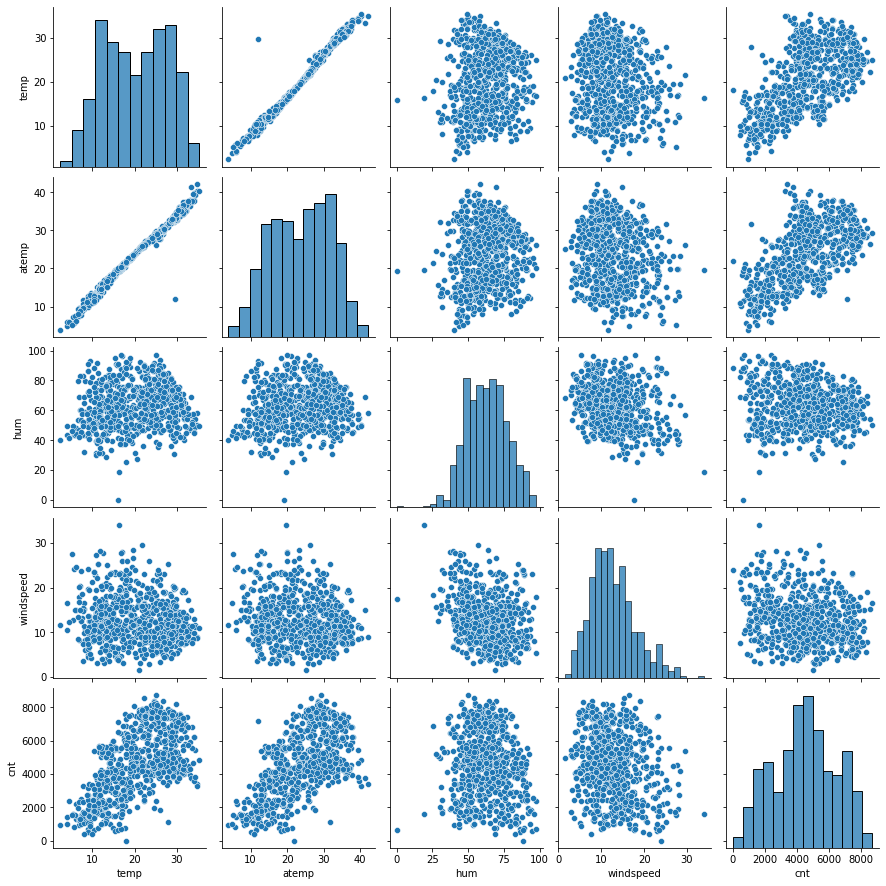

In [7]:
numerical_variables = ['temp','atemp','hum','windspeed','cnt']
sns.pairplot(data[numerical_variables])
plt.show()

## Plot categorical variables

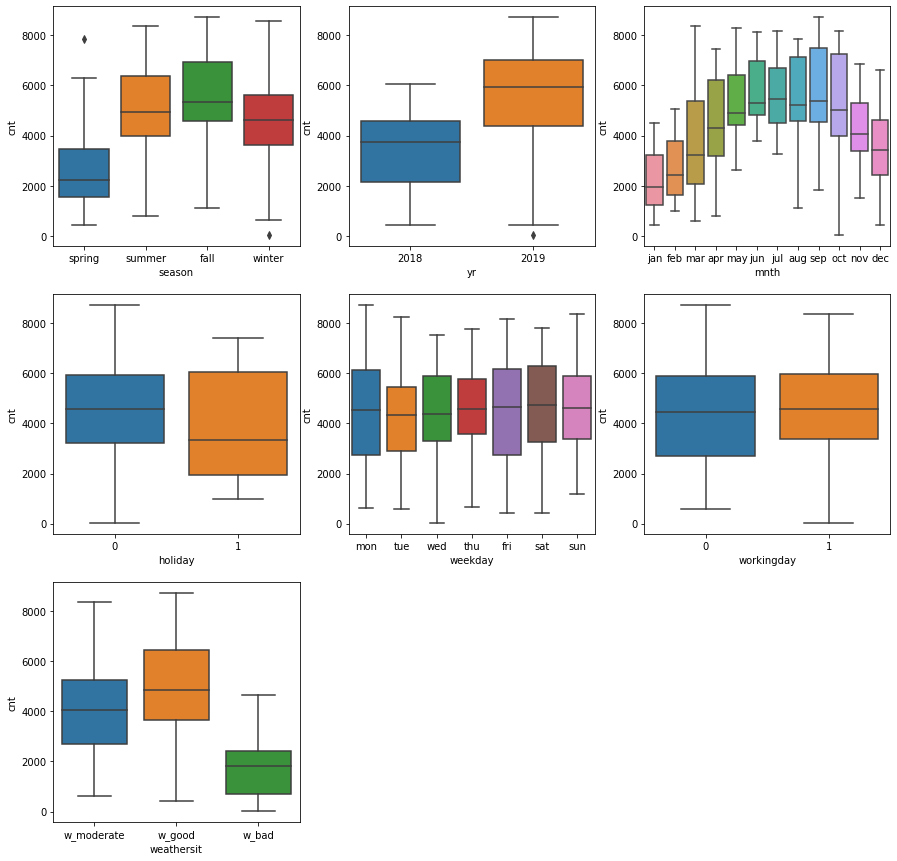

In [8]:
categorical_variables = [var for var in data.columns if var not in numerical_variables]
plt.figure(figsize=(15,15))
for num,var in enumerate(categorical_variables):
    plt.subplot(3,3,num+1)
    sns.boxplot(x=var,y='cnt',data=data)

# Step 3: Data Preparation
## Create dummy variables

In [9]:
## yr
data['yr'] = data['yr'].map({2018:0,2019:1})

## mnth
mnth_dummy = pd.get_dummies(data['mnth'],drop_first=True)
data = pd.concat([data,mnth_dummy],axis=1)
data.drop('mnth',axis=1,inplace=True)

## season
season_dummy = pd.get_dummies(data['season'],drop_first=True)
data = pd.concat([data,season_dummy],axis=1)
data.drop('season',axis=1,inplace=True)

## weekday
weekday_dummy = pd.get_dummies(data['weekday'],drop_first=True)
data = pd.concat([data,weekday_dummy],axis=1)
data.drop('weekday',axis=1,inplace=True)

## weathersit
weathersit_dummy = pd.get_dummies(data['weathersit'],drop_first=True)
data = pd.concat([data,weathersit_dummy],axis=1)
data.drop('weathersit',axis=1,inplace=True)

data

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,summer,winter,mon,sat,sun,thu,tue,wed,w_good,w_moderate
dteday,,,,,,,,,,,,,,,,,,,,,
01-01-2018,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,0,1
02-01-2018,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,1,0,0,1
03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,1,0
04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,1,0
05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27-12-2019,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,0,1,...,0,0,0,1,0,0,0,0,0,1
28-12-2019,1,0,1,10.386653,12.75230,59.0000,10.416557,3095,0,1,...,0,0,0,0,1,0,0,0,0,1
29-12-2019,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,0,1,...,0,0,1,0,0,0,0,0,0,1


## Step 4: Splitting the data into Training and Testing Sets

In [10]:
np.random.seed(0)
data_train, data_test = train_test_split(data,train_size=0.7,random_state=1)

## Rescaling the features: Min-Max Scaling

In [11]:
scaler = MinMaxScaler().fit(data_train)
data_train = pd.DataFrame(scaler.transform(data_train),index=data_train.index,columns=data_train.columns)

data_train
data_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,summer,winter,mon,sat,sun,thu,tue,wed,w_good,w_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.503922,0.031373,0.682353,0.564793,0.557248,0.526474,0.400317,0.525079,0.082353,0.072549,...,0.264706,0.250980,0.125490,0.141176,0.137255,0.143137,0.160784,0.150980,0.643137,0.325490
std,0.500476,0.174494,0.466018,0.226815,0.219147,0.194258,0.190021,0.218870,0.275172,0.259649,...,0.441610,0.434003,0.331599,0.348545,0.344454,0.350557,0.367693,0.358381,0.479544,0.469018
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.372655,0.381278,0.379602,0.264072,0.382737,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.579661,0.585630,0.524942,0.371641,0.527266,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.757395,0.733434,0.668793,0.512950,0.680022,0.000000,0.000000,...,1.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


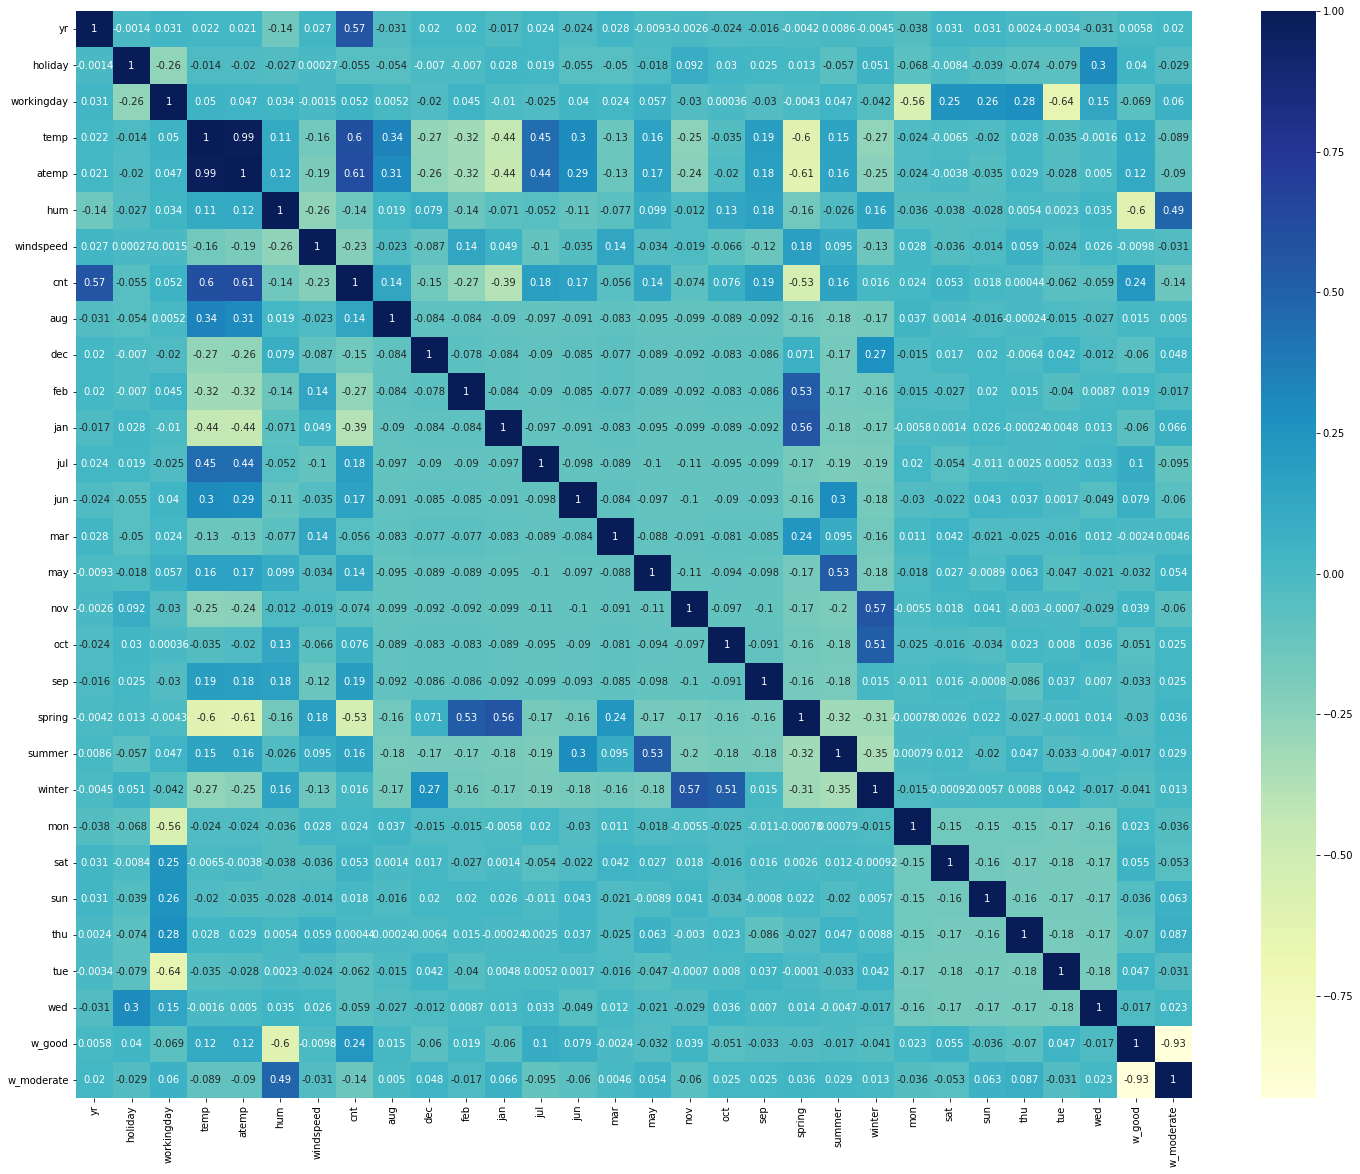

In [12]:
plt.figure(figsize =(25,20))
sns.heatmap(data_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

# Step 5: Train a linear mondel

In [13]:
y_train = data_train.pop('cnt')
X_train = data_train

## Starting with all variables

In [14]:
X_train_sm = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     88.96
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          1.32e-170
Time:                        01:03:56   Log-Likelihood:                 516.05
No. Observations:                 510   AIC:                            -974.1
Df Residuals:                     481   BIC:                            -851.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0611      0.044      1.395      0.164      -0.025       0.147
yr             0.2348      0.008     28.337      0.000       0.218       0.251
holiday       -0.0287      0.024     -1.205      0.229      -0.076       0.018
workingday     0.0365      0.014      2.671      0.008       0.010       0.063
temp           0.2747      0.141      1.952      0.052      -0.002       0.551
atemp          0.1639      0.134      1.221      0.223      -0.100       0.428
hum           -0.1501      0.032     -4.750      0.000      -0.212      -0.088
windspeed     -0.1541      0.024     -6.371      0.000      -0.202      -0.107
aug            0.0112      0.035      0.324      0.746      -0.057       0.079
dec           -0.0272      0.036     -0.763      0.446      -0.097       0.043
feb           -0.0181      0.035     -0.513      0.608      -0.088       0.051
jan           -0.0394      0.036     -1.088      0.277      -0.111       0.032
jul           -0.0255      0.035     -0.729      0.466      -0.094       0.043
jun            0.0028      0.024      0.116      0.908      -0.045       0.051
mar            0.0398      0.026      1.529      0.127      -0.011       0.091
may            0.0326      0.021      1.571      0.117      -0.008       0.073
nov           -0.0221      0.038     -0.586      0.558      -0.096       0.052
oct            0.0447      0.037      1.203      0.230      -0.028       0.118
sep            0.0891      0.032      2.751      0.006       0.025       0.153
spring        -0.0754      0.031     -2.410      0.016      -0.137      -0.014
summer         0.0280      0.027      1.050      0.294      -0.024       0.080
winter         0.0652      0.027      2.423      0.016       0.012       0.118
mon            0.0602      0.015      3.965      0.000       0.030       0.090
sat           -0.0001      0.015     -0.007      0.995      -0.030       0.030
sun           -0.0056      0.016     -0.363      0.717      -0.036       0.025
thu           -0.0153      0.015     -0.993      0.321      -0.045       0.015
tue           -0.0070      0.015     -0.454      0.650      -0.037       0.023
wed           -0.0183      0.015     -1.184      0.237      -0.049       0.012
w_good         0.2190      0.028      7.730      0.000       0.163       0.275
w_moderate     0.1846      0.026      7.114      0.000       0.134       0.236
==============================================================================
Omnibus:                       96.022   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.600
Skew:                          -0.944   Prob(JB):                     1.27e-53
Kurtosis:                       5.810   Cond. No.                     1.90e+15
==============================================================================

N

### The model is not good with all variables, hence we have to do feature selection using RFE

In [15]:
# Initially select top 15 variables 
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))
col = X_train.columns[rfe.support_]
X_train_new = X_train[col]
X_train_sm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_sm).fit()
print(lm.summary())

# Calculate VIF to check for multicolinearity
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values('VIF',ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     171.0
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          2.85e-179
Time:                        01:03:56   Log-Likelihood:                 501.47
No. Observations:                 510   AIC:                            -972.9
Df Residuals:                     495   BIC:                            -909.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0782      0.033      2.337      0.0

,Features,VIF
2,workingday,70.87
4,atemp,49.81
3,temp,49.38
12,tue,17.81
11,mon,13.52
13,w_good,11.01
14,w_moderate,8.76
1,holiday,4.29
5,hum,2.15
10,spring,1.71


'temp' has high VIF and high p_value. Hence we'll drop it

In [16]:
# drop tempt
X_train_new = X_train_new.drop('temp',axis=1)
X_train_sm = sm.add_constant(X_train_new)
lm  = sm.OLS(y_train,X_train_sm).fit()
print(lm.summary())

# calculate VIF to check multicolinearity
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values('VIF',ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     183.4
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          7.10e-180
Time:                        01:03:56   Log-Likelihood:                 500.19
No. Observations:                 510   AIC:                            -972.4
Df Residuals:                     496   BIC:                            -913.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0786      0.034      2.343      0.0

,Features,VIF
2,workingday,70.87
11,tue,17.80
10,mon,13.52
12,w_good,10.98
13,w_moderate,8.75
1,holiday,4.29
3,atemp,2.16
4,hum,2.15
9,spring,1.71
6,jul,1.36


'tue' has high VIF and high p_value. Hence we'll drop it

In [17]:
# drop tue
X_train_new = X_train_new.drop('tue',axis=1)
X_train_sm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_sm).fit()
print(lm.summary())

# calculate VIF to check multicolinearity
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values('VIF',ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     183.4
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          7.10e-180
Time:                        01:03:56   Log-Likelihood:                 500.19
No. Observations:                 510   AIC:                            -972.4
Df Residuals:                     496   BIC:                            -913.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0810      0.043      1.889      0.0

,Features,VIF
3,atemp,15.64
11,w_good,10.97
4,hum,9.50
12,w_moderate,6.59
2,workingday,4.99
5,windspeed,4.99
9,spring,2.09
0,yr,2.04
10,mon,1.71
6,jul,1.50


'holiday' has high p_value. Hence we'll drop it

In [18]:
# drop holiday
X_train_new = X_train_new.drop('holiday',axis=1)
X_train_sm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_sm).fit()
print(lm.summary())

# calculate VIF to check multicolinearity
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values('VIF',ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     198.0
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          1.41e-180
Time:                        01:03:56   Log-Likelihood:                 499.11
No. Observations:                 510   AIC:                            -972.2
Df Residuals:                     497   BIC:                            -917.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0751      0.043      1.757      0.0

,Features,VIF
2,atemp,15.64
10,w_good,10.75
3,hum,9.45
11,w_moderate,6.52
4,windspeed,4.97
1,workingday,4.39
8,spring,2.09
0,yr,2.04
9,mon,1.60
5,jul,1.50


'atemp' has high VIF. Hence we'll drop it

In [19]:
# drop atemp
X_train_new = X_train_new.drop('atemp',axis=1)
X_train_sm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_sm).fit()
print(lm.summary())

# calculate VIF to check multicolinearity
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values('VIF',ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     129.2
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          4.09e-138
Time:                        01:03:57   Log-Likelihood:                 395.69
No. Observations:                 510   AIC:                            -767.4
Df Residuals:                     498   BIC:                            -716.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1912      0.052      3.712      0.0

,Features,VIF
2,hum,7.78
9,w_good,7.13
10,w_moderate,5.58
3,windspeed,4.91
1,workingday,4.31
0,yr,2.03
8,mon,1.60
7,spring,1.45
6,sep,1.21
4,jul,1.19


'hum' has high VIF. Hence we'll drop it

In [20]:
# drop hum
X_train_new = X_train_new.drop('hum',axis=1)
X_train_sm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_sm).fit()
print(lm.summary())

# calculate VIF to check multicolinearity
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values('VIF',ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     141.7
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          8.28e-139
Time:                        01:03:57   Log-Likelihood:                 394.76
No. Observations:                 510   AIC:                            -767.5
Df Residuals:                     499   BIC:                            -720.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1395      0.035      4.041      0.0

,Features,VIF
8,w_good,5.71
2,windspeed,4.88
1,workingday,4.06
9,w_moderate,3.46
0,yr,2.02
7,mon,1.56
6,spring,1.45
3,jul,1.19
5,sep,1.15
4,oct,1.13


Observe that all variables are statistically significant and all but 'w_good' have VIF below 5. 'w_good' is just slightly above the benchmark of 5; hence we could decide to keep it in our model. As a result, this is our final model

## Residual Analysis of the training data
### We check if the error terms are normally distributed:

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


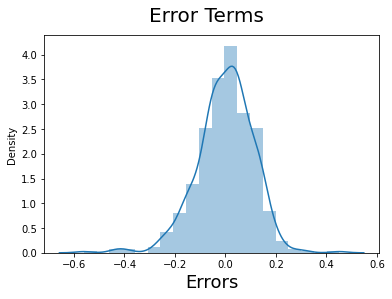

In [21]:
# predict the training data
y_train_pred = lm.predict(X_train_sm)

# plot the error term
fig = plt.figure()
sns.distplot((y_train-y_train_pred),bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=18)
plt.show()

# Step 5: Model Evaluation

In [22]:
selected_vars = X_train_new.columns.to_list()
selected_vars

['yr',
 'workingday',
 'windspeed',
 'jul',
 'oct',
 'sep',
 'spring',
 'mon',
 'w_good',
 'w_moderate']

### Apply the scaling on the test sets

In [23]:
data_test[:] = scaler.transform(data_test)
data_test = data_test[selected_vars+['cnt']]
data_test.describe()

,yr,workingday,windspeed,jul,oct,sep,spring,mon,w_good,w_moderate,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.490909,0.686364,0.402761,0.063636,0.095455,0.072727,0.309091,0.186364,0.613636,0.363636,0.495310
std,0.501057,0.465029,0.173235,0.244661,0.294512,0.260281,0.463173,0.390288,0.488026,0.482143,0.230612
min,0.000000,0.000000,0.057872,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069144
25%,0.000000,0.000000,0.285446,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.318540
50%,0.000000,1.000000,0.387208,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.479579
75%,1.000000,1.000000,0.488116,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.686925
max,1.000000,1.000000,1.157215,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.937069


### Dividing into X_test and y_test

In [24]:
y_test = data_test.pop('cnt')
X_test = data_test

### Making prediction

In [25]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lm.predict(X_test_sm)

### Model Evaluation

0.7842773634907962

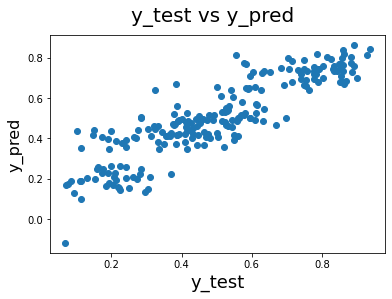

In [26]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred',fontsize=20)
plt.xlabel('y_test',fontsize=18)
plt.ylabel('y_pred',fontsize=16)

# Calculate R^2
r2_score(y_test,y_test_pred)

We can see that r_square from the test set is very similar to r_square from the training set, which implies our model can generalize to unseen data